<h1 align="center"><b> Assignment Colab_02 </b></h1>
<h1 align="center"><b> PREDICT EXECUTION TIME OF A PROGRAM WITH GIVEN THE NUMBERS OF INPUT </b></h1>

**Thành viên nhóm:**
* Đỗ Trọng Khánh - 19521676
* Võ Phạm Duy Đức - 19521383
* Trịnh Công Danh - 19521326

**Nguồn tham khảo:**
* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=regression#sklearn.linear_model.LinearRegression)
* [Linear Regression Exampale](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

# Xử lí dữ liệu

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lấy dữ liệu train và dữ liệu test

In [29]:
# Dữ liệu train từ data2.csv
data_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", header=None, names = ['x', 'y'])
# Dữ liệu test từ data3.csv
data_test = pd.read_csv("https://cs.uit.edu.vn/data3.txt", header=None, names = ['x', 'y'])
data_train
#data_test

,x,y
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
...,...,...
71110,4472112,0.350379
71111,5471895,0.429955
71112,9837364,0.801394
71113,9466593,0.776407


#Phân chia dữ liệu

In [30]:
# Tập train
x_train, y_train = np.array(data_train['x']).reshape(-1,1), np.array(data_train['y'])
# Tập test
x_test, y_test = np.array(data_test['x']).reshape(-1,1), np.array(data_test['y'])

#Trực quan hóa dữ liệu train 

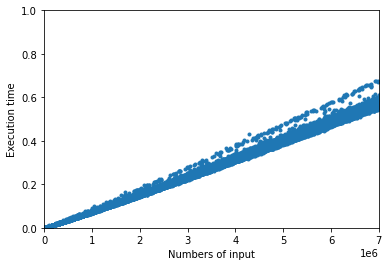

In [31]:
plt.plot(x_train, y_train, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.axis([0, 7000000, 0, 1])
plt.show()

# Sử dụng phương pháp Linear Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# Tạo model train
model_train = LinearRegression().fit(x_train, y_train)

Mean squared error with data_to_train:  0.00014337728721748835


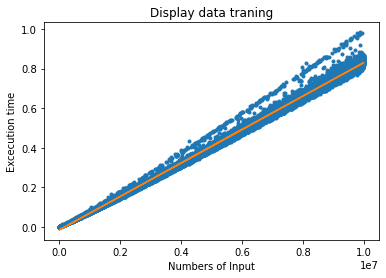

In [33]:
# Mean squared error of data train
print("Mean squared error with data_to_train: ", mean_squared_error(y_train, model_train.predict(x_train)))

plt.title("Display data traning")
plt.plot(x_train, y_train, ".")
plt.plot(x_train, model_train.predict(x_train))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

Mean squared error of data_to_test:  0.020664949397549082


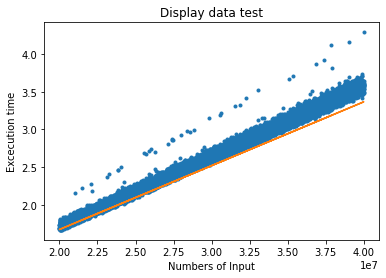

In [34]:
# Mean squared error of data test
print("Mean squared error of data_to_test: ", mean_squared_error(y_test, model_train.predict(x_test)))

plt.title("Display data test")
plt.plot(x_test, y_test, ".")
plt.plot(x_test, model_train.predict(x_test))
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

In [40]:
# Trung bình cộng của thời gian chạy của dữ liệu test
print("Average of data test:" , np.average(y_test))
# Mean squared error of data test
MSE = mean_squared_error(y_test, model_train.predict(x_test))
print("Mean squared error:" ,MSE)

sqrt_MSE = math.sqrt(MSE)
print("Square root MSE:", sqrt_MSE)

print("Percent difference:", sqrt_MSE/np.average(y_test))

Average of data test: 2.642811968838527
Mean squared error: 0.020664949397549082
Square root MSE: 0.14375308482794058
Percent difference: 0.05439398887357004


#Nhận xét 

- Vì thời gian chạy của chương trình phải phụ thuộc vào độ phức tạp của thuật toán đó nên độ phức tạp của thuật toán làm chi phối thời gian chạy của chương trìnhình
- Vì thế thời gian chạy của thuật toán và kích thước của của Input đầu vào chưa chắc nó sẽ là một hàm tuyến tính nên khi chung ta tìm được hệ số y = ax + b tốt đến cỡ nào đi nữa thì khi nó gặp **x** có giá trị lớn hơn thì sẽ xuất hiện sai lệch (Được thể hiện ở Percent difference: 5% được tính ở trên)
- Chênh lệch 5% là một con tốt đối với modle sử dụng Linear Regression nhưng khi Input đầu vào là một con số lơn sẽ kiến độ sai lệch của modle càng nhiều


# Sử dụng phương pháp Linear Regression nhiều biến

- Sử dụng phương pháp tăng cường dữ liệu: **y = a*x + b* x^2 + c * lg(x) + d *x *lg(x) + e**

* Tăng cường dữ liệu ở đây có nghĩa là thêm số chiều vào trong dữ liệu của mình

In [42]:
X = []
x_train = data_train['x']
for x in x_train:
  X.append([x, x**2, x*np.log(x), np.log(x)])

In [43]:
new_model_train = LinearRegression().fit(X, y_train)

In [44]:
X_test = []
x_test = data_test['x']
for x in x_test:
  X_test.append([x, x**2, x*np.log(x), np.log(x)])

In [47]:
# Trung bình cộng của thời gian chạy của dữ liệu test
print("Average of data test:" , np.average(y_test))
# Mean squared error of data test
MSE = mean_squared_error(y_test, new_model_train.predict(X_test))
print("Mean squared error new model:" ,MSE)

sqrt_MSE = math.sqrt(MSE)
print("Square root MSE:", sqrt_MSE)

print("Percent difference:", sqrt_MSE/np.average(y_test))

Average of data test: 2.642811968838527
Mean squared error new model: 0.004181195754594616
Square root MSE: 0.06466216633081988
Percent difference: 0.02446718385312817


#Nhận xét

- Ta thấy được Mean squared error của model sử dụng Linear Regression nhiều biến nhỏ hơn 5 lần so với model sủ dụng Linear Regression 1 biến là: **0.004181195754594616**
- Và độ chênh lệch giảm còn **2%** (Percent difference: 0.02446718385312817)